In [26]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt

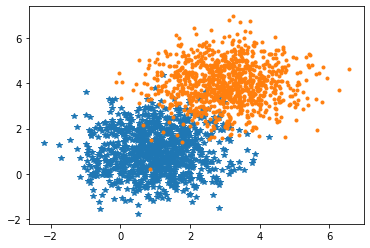

In [37]:
center1=[1,1]
center2=[3,4]
n=1000
class1=np.matlib.repmat(center1,n,1) + np.random.randn(n,len(center1))
class2= np.matlib.repmat(center2,n,1) + np.random.randn(n,len(center2))
D = np.append(class1,class2,axis=0)
Data = np.concatenate((D, np.ones((2*n,1))),axis = 1).T
label = np.concatenate((np.ones((n,1)),-1*np.ones((n,1))),axis = 0)
y = label.T
plt.plot(class1[:,0],class1[:,1],'*',class2[:,0],class2[:,1],'.')
plt.show()

In [28]:
def prediction(w, Data):
    pred = []
    z = np.dot(w,Data)
    a = sigmoid(z)
    for i in range(0,len(a[0])):
        if (a[0][i] > 0.5): 
            pred.append(1)
        elif (a[0][i] <= 0.5):
            pred.append(-1)
    return pred


Test Accuracy 94.5


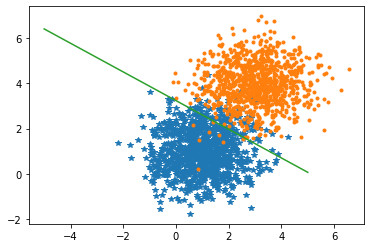

In [38]:
learning_rate = 0.01
w = np.random.randn(1,3)
for i in range(1,1500):
    z = np.dot(w,Data)
    y_pred = prediction(w, Data)
    val = -np.multiply(y,z)
    J = np.sum(np.log(1+np.exp(val)))
    num = -np.multiply(y,np.exp(val))
    den = 1+np.exp(val)
    f = num/den
    gradJ = np.dot(Data,f.T)
    w = w - learning_rate*gradJ.T
    Test_predict = prediction(w, Data)
print("Test Accuracy",np.mean(y[0]==Test_predict)*100)
x =  np.linspace(-5,5,100)
h_x = -(w[0,0]/w[0,1])*x - (w[0,2]/w[0,1])
plt.plot(class1[:,0],class1[:,1],'*',class2[:,0],class2[:,1],'.')
plt.plot(x,h_x)
plt.show()